<a href="https://colab.research.google.com/github/MikhailKuklin/exploratory_data_analysis_pandas/blob/main/2021_08_27_exploratory_data_analysis_pandas_partII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
# load necessary library/modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files

In [217]:
# open database file - cvs in that case

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [218]:
# check shape of the dataframe

df.shape

(112232, 62)

In [219]:
# check for missing values

df.isna().sum()

iso_code                           0
continent                       5173
location                           0
date                               0
total_cases                     4991
                               ...  
handwashing_facilities         62015
hospital_beds_per_thousand     21305
life_expectancy                 5760
human_development_index        12172
excess_mortality              108314
Length: 62, dtype: int64

In [221]:
# remove NaN continents

df = df[df['continent'].notna()]

In [222]:
# get an average for new cases per million at each continent

df_cont=df.groupby("continent")["new_cases_per_million"].mean()
df_cont

continent
Africa            26.161460
Asia              69.484841
Europe           156.203127
North America     66.015927
Oceania           14.949665
South America    123.020791
Name: new_cases_per_million, dtype: float64

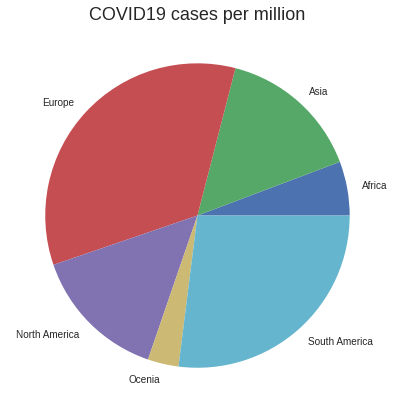

In [223]:
# create a pie chart

from google.colab import files

plt.figure(figsize=(7,7))
plt.title('COVID19 cases per million',fontsize=18)
my_labels='Africa','Asia','Europe','North America','Ocenia','South America'
plt.pie(df_cont, labels=my_labels);
plt.savefig("pie_chart1.png",bbox_inches='tight')

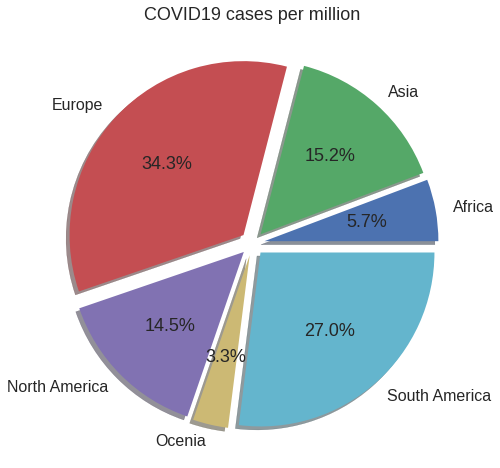

In [224]:
# improve pie chart

explode = (0.07, 0.07, 0.07, 0.07,0.07,0.07) 
plt.figure(figsize=(8,8))
plt.title('COVID19 cases per million',fontsize=18)
my_labels='Africa','Asia','Europe','North America','Ocenia','South America'

patches, texts, autotexts=plt.pie(df_cont, labels=my_labels,explode=explode,shadow=True,autopct='%1.1f%%')
for text in texts:
    text.set_size(16)
for text in autotexts:
    text.set_size(18)
plt.savefig("pie_chart2.png",bbox_inches='tight')
plt.show()

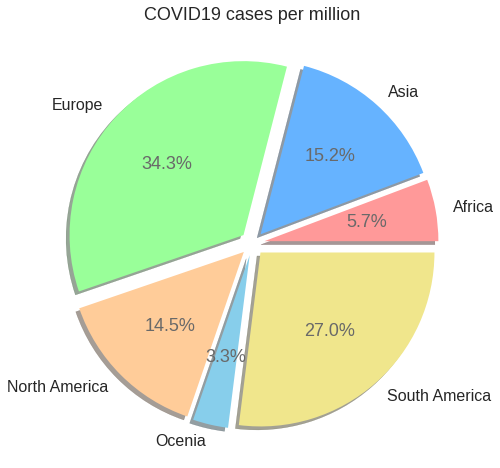

In [225]:
# improve pie chart

explode = (0.07, 0.07, 0.07, 0.07,0.07,0.07) 
plt.figure(figsize=(8,8))
plt.title('COVID19 cases per million',fontsize=18)
my_labels='Africa','Asia','Europe','North America','Ocenia','South America'
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#87CEEB','#F0E68C']
patches, texts, autotexts=plt.pie(df_cont, labels=my_labels,explode=explode,shadow=True,autopct='%1.1f%%',colors=colors) # startangle=90)
for text in texts:
    text.set_size(16)
for text in autotexts:
    text.set_size(18)
for ctext in autotexts:
    ctext.set_color('#696969')
plt.show()

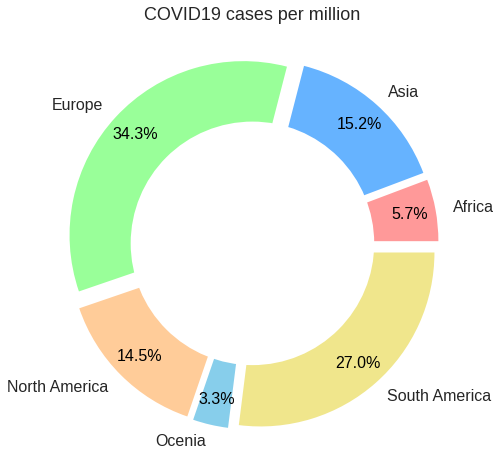

In [226]:
# get another visualization

explode = (0.07, 0.07, 0.07, 0.07,0.07,0.07) 
plt.figure(figsize=(8,8))
plt.title('COVID19 cases per million',fontsize=18)
my_labels='Africa','Asia','Europe','North America','Ocenia','South America'
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#87CEEB','#F0E68C']
patches, texts, autotexts=plt.pie(df_cont, labels=my_labels,explode=explode,autopct='%1.1f%%',colors=colors,pctdistance=0.85) # startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gcf()
plt.gca().add_artist(centre_circle)
for text in texts:
    text.set_size(16)
for text in autotexts:
    text.set_size(16)
for ctext in autotexts:
    ctext.set_color('black')
plt.savefig("pie_chart3.png",bbox_inches='tight')
plt.show()

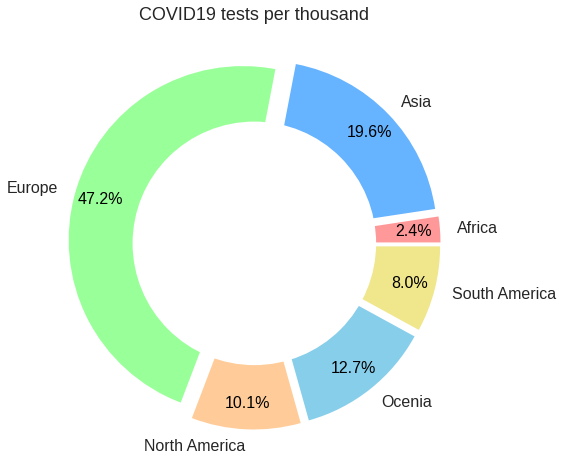

In [227]:
# pie chart

df_cont_tests=df.groupby("continent")["new_tests_per_thousand"].mean()

explode = (0.07, 0.07, 0.07, 0.07,0.07,0.07) 
plt.figure(figsize=(8,8))
plt.title('COVID19 tests per thousand',fontsize=18)
my_labels='Africa','Asia','Europe','North America','Ocenia','South America'
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#87CEEB','#F0E68C']
patches, texts, autotexts=plt.pie(df_cont_tests, labels=my_labels,explode=explode,autopct='%1.1f%%',colors=colors,pctdistance=0.85) # startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gcf()
plt.gca().add_artist(centre_circle)
for text in texts:
    text.set_size(16)
for text in autotexts:
    text.set_size(16)
for ctext in autotexts:
    ctext.set_color('black')
plt.savefig("pie_chart4.png",bbox_inches='tight')
plt.show()

In [228]:
# correlations between new cases of number of tests

print(f"{df_cont.corr(df_cont_tests)*100:.0f}%")

69%


In [229]:
# show total cases for each country

df_tc = df[df['total_cases'].notna()]

df_tc.groupby('location').total_cases.max().sort_values(ascending=False)

location
United States           38384360.0
India                   32603188.0
Brazil                  20676561.0
France                   6777676.0
Russia                   6728699.0
                           ...    
Marshall Islands               4.0
Samoa                          3.0
Palau                          2.0
Kiribati                       2.0
Micronesia (country)           1.0
Name: total_cases, Length: 193, dtype: float64

In [230]:
# aggregates

df_tcm = df[df['total_cases_per_million'].notna()]

df_tcm.groupby(['continent','date']).agg({'total_cases_per_million':('min','max')})

total_cases_per_million            
                                             min         max
continent     date                                          
Africa        2020-02-14                   0.010       0.010
              2020-02-15                   0.010       0.010
              2020-02-16                   0.010       0.010
              2020-02-17                   0.010       0.010
              2020-02-18                   0.010       0.010
...                                          ...         ...
South America 2021-08-22               11416.607  113590.945
              2021-08-23               11482.721  113726.687
              2021-08-24               11515.356  113906.328
              2021-08-25               11554.039  114061.077
              2021-08-26               11595.747  114212.573

[3437 rows x 2 columns]

In [231]:
# reset_index() to have dataframe instead of series

ex01=df.groupby(['date']).total_cases.sum().reset_index()
ex01

,date,total_cases
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
599,2021-08-22,211842136.0
600,2021-08-23,212539354.0
601,2021-08-24,213204161.0
602,2021-08-25,213911471.0


In [232]:
# include location

ex00=df.groupby(['date','location'])['total_cases'].max().reset_index()
ex00

,date,location,total_cases
0,2020-01-01,Argentina,NaN
1,2020-01-01,Mexico,NaN
2,2020-01-01,Peru,NaN
3,2020-01-02,Argentina,NaN
4,2020-01-02,Mexico,NaN
...,...,...,...
107054,2021-08-26,Venezuela,329736.0
107055,2021-08-26,Vietnam,392938.0
107056,2021-08-26,Yemen,7676.0
107057,2021-08-26,Zambia,205315.0


In [233]:
# reset_index() to have dataframe instead of series

ex02=df.groupby(['location']).total_cases.max().reset_index()
ex02

,location,total_cases
0,Afghanistan,152822.0
1,Albania,142253.0
2,Algeria,193674.0
3,Andorra,15016.0
4,Angola,46726.0
...,...,...
219,Vietnam,392938.0
220,Wallis and Futuna,NaN
221,Yemen,7676.0
222,Zambia,205315.0


In [234]:
# count number of iso codes for each continent

df.groupby('continent').iso_code.count().reset_index()

,continent,iso_code
0,Africa,28652
1,Asia,26336
2,Europe,26453
3,North America,14159
4,Oceania,4803
5,South America,6656


In [235]:
# group by month and calculate sum

df.date = pd.to_datetime(df.date)
df_col=df[['new_cases','date']]
dg1 = df_col.groupby(pd.Grouper(key='date', freq='M')).sum()
dg1.index = dg1.index.strftime('%B %Y')
dg1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,new_cases
date,
January 2020,9370.0
February 2020,75382.0
March 2020,790490.0
April 2020,2405674.0
May 2020,2906066.0
June 2020,4269650.0
July 2020,7146912.0
August 2020,7904248.0
September 2020,8504359.0


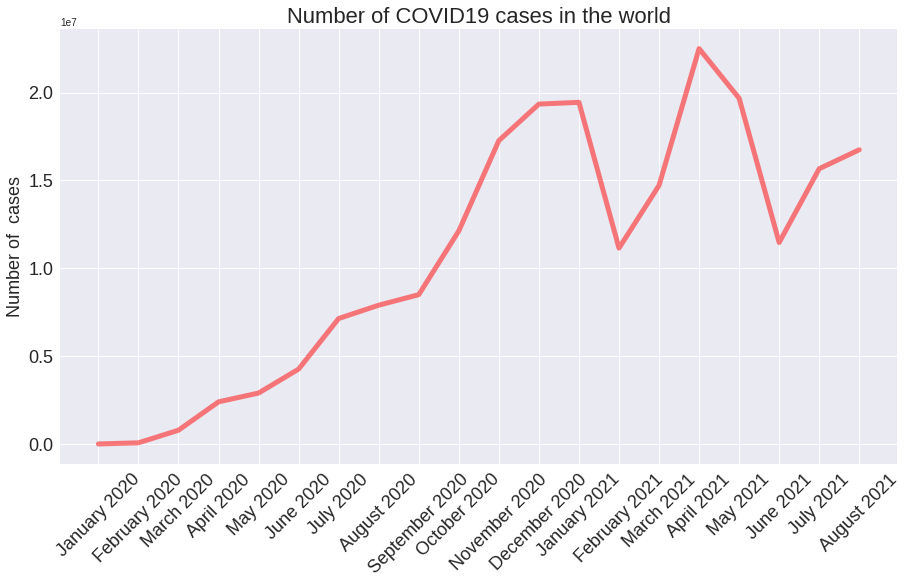

In [236]:
# plot number of cases for each month

plt.style.use('seaborn')
plt.figure(figsize=(15,8))
plt.xticks(fontsize=18,rotation='45')
plt.ylabel('Number of  cases', fontsize=18)
plt.yticks(fontsize=18)
plt.title('Number of COVID19 cases in the world',fontsize=22)
plt.plot(dg1, label = 'label', color = 'red', linewidth = 5, alpha = 0.5)
plt.savefig("plot1.png",bbox_inches='tight')
plt.show()

In [237]:
# create columns for month, year and day

df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,month,year,month_year
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2,2020,2020-02
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2,2020,2020-02
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2,2020,2020-02
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2,2020,2020-02
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2,2020,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112227,ZWE,Africa,Zimbabwe,2021-08-22,122652.0,165.0,366.286,4249.0,13.0,20.000,8252.210,11.101,24.644,285.879,0.875,1.346,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773199.0,2312117.0,1461082.0,NaN,19957.0,69134.0,25.00,15.32,9.68,NaN,4581.0,73.15,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,8,2021,2021-08
112228,ZWE,Africa,Zimbabwe,2021-08-23,123001.0,349.0,416.143,4293.0,44.0,26.286,8275.692,23.481,27.999,288.839,2.960,1.769,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3829011.0,2345043.0,1483968.0,NaN,55812.0,69004.0,25.37,15.54,9.83,NaN,4572.0,73.15,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,8,2021,2021-08
112229,ZWE,Africa,Zimbabwe,2021-08-24,123320.0,319.0,324.857,4320.0,27.0,23.429,8297.154,21.463,21.857,290.656,1.81

In [238]:
# group new cases for each continent per month_year

group01 = df.groupby(['month_year','continent'])
group01.new_cases.mean()

month_year  continent    
2020-01     Asia               90.611650
            Europe              0.894737
            North America       0.733333
            Oceania             1.500000
            South America            NaN
                                ...     
2021-08     Asia             5607.797054
            Europe           2777.811873
            North America    7304.418060
            Oceania           114.328302
            South America    3920.528846
Name: new_cases, Length: 119, dtype: float64

In [239]:
for key, group in group01:
    print(key, len(group))

(Period('2020-01', 'M'), 'Asia') 134
(Period('2020-01', 'M'), 'Europe') 35
(Period('2020-01', 'M'), 'North America') 47
(Period('2020-01', 'M'), 'Oceania') 8
(Period('2020-01', 'M'), 'South America') 62
(Period('2020-02', 'M'), 'Africa') 71
(Period('2020-02', 'M'), 'Asia') 505
(Period('2020-02', 'M'), 'Europe') 441
(Period('2020-02', 'M'), 'North America') 100
(Period('2020-02', 'M'), 'Oceania') 60
(Period('2020-02', 'M'), 'South America') 69
(Period('2020-03', 'M'), 'Africa') 867
(Period('2020-03', 'M'), 'Asia') 1212
(Period('2020-03', 'M'), 'Europe') 1350
(Period('2020-03', 'M'), 'North America') 444
(Period('2020-03', 'M'), 'Oceania') 105
(Period('2020-03', 'M'), 'South America') 302
(Period('2020-04', 'M'), 'Africa') 1552
(Period('2020-04', 'M'), 'Asia') 1372
(Period('2020-04', 'M'), 'Europe') 1380
(Period('2020-04', 'M'), 'North America') 690
(Period('2020-04', 'M'), 'Oceania') 120
(Period('2020-04', 'M'), 'South America') 360
(Period('2020-05', 'M'), 'Africa') 1662
(Period('2020-

In [240]:
# estimate for each continent

ex01=df.groupby(['continent','month_year']).new_cases_per_million.mean()
ex01['Europe']

month_year
2020-01      0.020579
2020-02      0.306408
2020-03     35.700850
2020-04     45.703043
2020-05     16.199553
2020-06     15.654028
2020-07     23.962107
2020-08     32.445041
2020-09     66.399106
2020-10    247.664084
2020-11    392.491702
2020-12    363.938532
2021-01    314.606058
2021-02    249.378869
2021-03    332.237454
2021-04    262.785647
2021-05    112.316602
2021-06     42.295638
2021-07    118.819853
2021-08    174.653787
Freq: M, Name: new_cases_per_million, dtype: float64

In [241]:
# dataframe instead of series

ex02=df.groupby(['continent','month_year']).new_cases_per_million.mean().reset_index()
ex02[ex02.continent=='Africa'].tail(1)

,continent,month_year,new_cases_per_million
18,Africa,2021-08,68.406095


In [242]:
# select Finland

df_fin=df[df.location=='Finland']
df_fin2020=df_fin[df_fin.year == 2020]
df_fin2021=df_fin[df_fin.year == 2021]

In [243]:
# make a plot

res2=df_fin2021.groupby("month")["new_cases"].sum()
res1=df_fin2020.groupby("month")["new_cases"].sum()
plt.style.use('seaborn')
plt.figure(figsize=(20,10),dpi=600)
plt.title("Number of COVID19 cases in Finland", fontsize=40)
plt.plot(res1, color = 'black', linewidth = 5, alpha = 0.5)
plt.plot(res2, color = 'red', linewidth = 5, alpha = 0.5)
res1.plot.area(stacked=False)
res2.plot.area(stacked=False)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.ylabel('New cases',fontsize=32)
plt.xlabel('Month',fontsize=32)
plt.legend(["2020", "2021"],fontsize=36)
plt.savefig("plot2.png") 
plt.show()

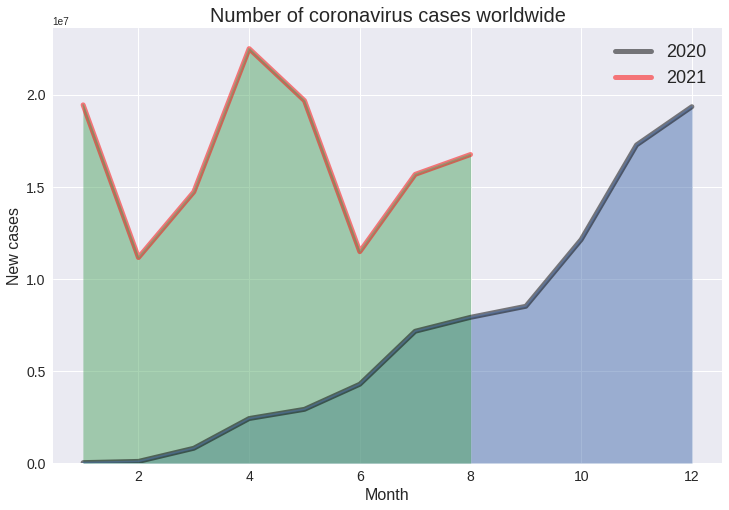

In [244]:
# same plot but worldwide

df_2020=df[df.year == 2020]
df_2021=df[df.year == 2021]

res2=df_2021.groupby("month")["new_cases"].sum()
res1=df_2020.groupby("month")["new_cases"].sum()
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.title("Number of coronavirus cases worldwide", fontsize=20)
plt.plot(res1, color = 'black', linewidth = 5, alpha = 0.5)
plt.plot(res2, color = 'red', linewidth = 5, alpha = 0.5)
res1.plot.area(stacked=False)
res2.plot.area(stacked=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('New cases',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.legend(["2020", "2021"],fontsize=18)
plt.show()

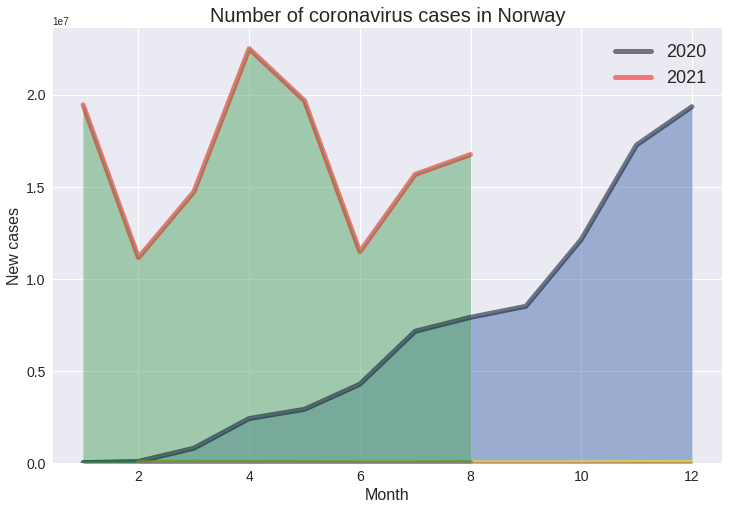

In [245]:
# same plot for Norway

df_nor=df[df.location=='Norway']

df_nor2020=df_nor[df_nor.year == 2020]
df_nor2021=df_nor[df_nor.year == 2021]

res4=df_nor2021.groupby("month")["new_cases"].sum()
res3=df_nor2020.groupby("month")["new_cases"].sum()
#res=res1+res2
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.title("Number of coronavirus cases in Norway", fontsize=20)
plt.plot(res1, color = 'black', linewidth = 5, alpha = 0.5)
plt.plot(res2, color = 'red', linewidth = 5, alpha = 0.5)
res1.plot.area(stacked=False)
res2.plot.area(stacked=False)
plt.plot(res3, color = 'yellow', linewidth = 5, alpha = 0.5)
plt.plot(res4, color = 'green', linewidth = 5, alpha = 0.5)
res3.plot.area(stacked=False)
res4.plot.area(stacked=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('New cases',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.legend(["2020", "2021"],fontsize=18)
plt.show()

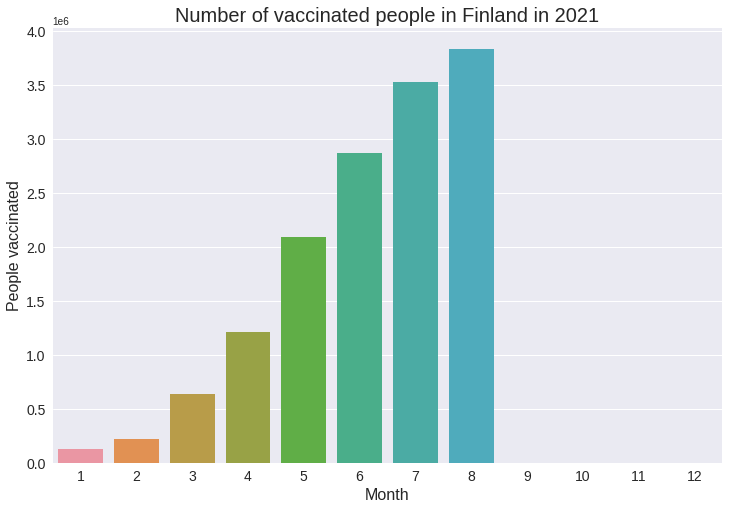

In [246]:
# bar plot for number of vaccinated people

plt.figure(figsize=(12,8))
sns.barplot(x='month',y='people_vaccinated', data=df_fin, ci=False)
plt.title("Number of vaccinated people in Finland in 2021", fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('People vaccinated', fontsize=16)
plt.yticks(fontsize=14)
plt.show()

In [247]:
#df_fin[df_fin.isnull().any(axis=1)]

df_fin_pv=df_fin[['people_vaccinated','date']]
df_fin_pv.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


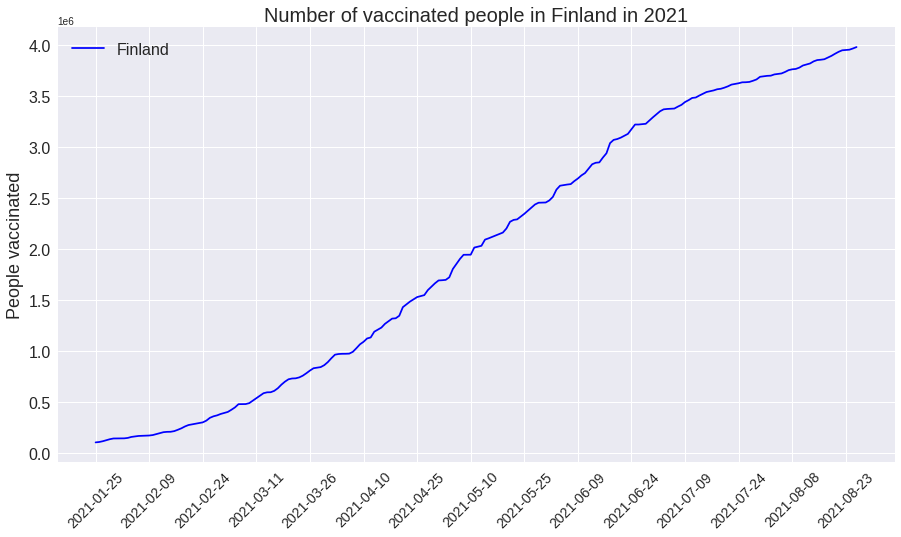

In [248]:
# plot for number of vaccinated people

plt.figure(figsize=(15,8))
ax = plt.axes()
plt.plot(df_fin_pv['date'],df_fin_pv['people_vaccinated'],color='blue')
plt.title("Number of vaccinated people in Finland in 2021", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Date', fontsize=16)
plt.ylabel('People vaccinated', fontsize=18)
plt.yticks(fontsize=16)
plt.legend(['Finland'],fontsize=16)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


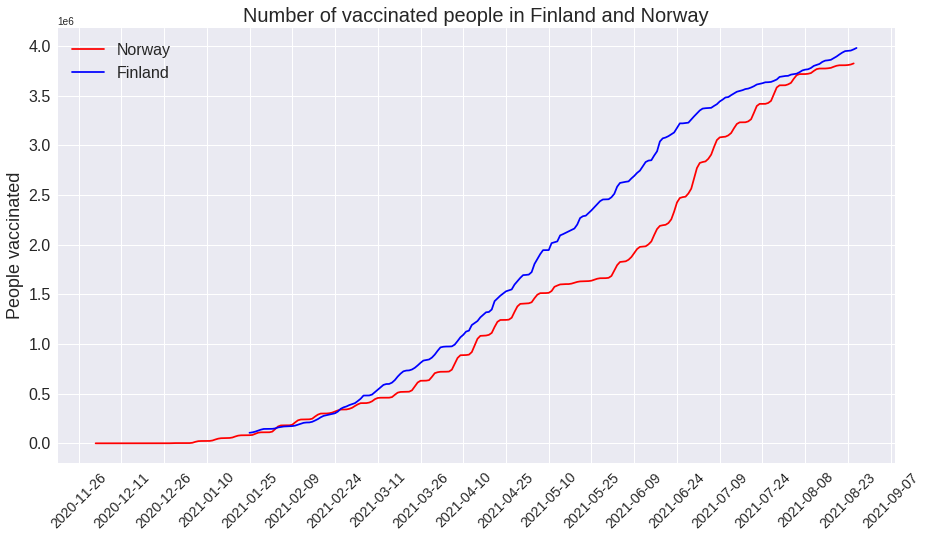

In [249]:
# combine Finland and Norway

df_nor_pv=df_nor[['people_vaccinated','date']]
df_nor_pv.dropna(inplace=True)

plt.figure(figsize=(15,8))
ax = plt.axes()
plt.plot(df_nor_pv['date'],df_nor_pv['people_vaccinated'],color='red')
plt.title("Number of vaccinated people in Finland and Norway", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Date', fontsize=16)
plt.ylabel('People vaccinated', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(rotation=45)
plt.plot(df_fin_pv['date'],df_fin_pv['people_vaccinated'],color='blue')
plt.legend(['Norway','Finland'],fontsize=16)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.savefig("plot3.png",bbox_inches='tight')
plt.show()

In [250]:
# pivoted table

pivoted = ex02.pivot(
    columns='month_year',
    index='continent',
    values='new_cases_per_million')
pivoted

month_year,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
continent,,,,,,,,,,,,,,,,,,,,
Africa,NaN,0.001652,0.563207,1.931048,6.247132,8.534050,12.657952,10.649239,10.215499,12.611715,13.257569,17.945873,34.825042,27.916394,27.920360,33.880728,52.526879,53.900127,69.029651,68.406095
Asia,0.116155,0.370379,2.836798,12.598026,29.954106,38.837655,42.880189,34.213161,47.342161,58.433114,81.551664,78.579830,73.536549,74.287859,95.100872,124.439518,140.325739,91.741117,98.973225,154.515404
Europe,0.020579,0.306408,35.700850,45.703043,16.199553,15.654028,23.962107,32.445041,66.399106,247.664084,392.491702,363.938532,314.606058,249.378869,332.237454,262.785647,112.316602,42.295638,118.819853,174.653787
North America,0.008400,0.008833,4.889981,10.649577,11.082081,21.049830,40.847133,46.341292,47.735436,55.003227,69.552071,104.894405,114.369836,92.879102,60.533889,63.148470,76.508997,75.485009,97.950157,198.519709
Oceania,0.058833,0.026903,3.648954,2.286433,0.179685,0.278925,3.152976,3.376089,0.690242,0.651338,0.513112,0.254617,0.263247,0.317329,2.089577,2.453348,3.237669,15.358130,92.051358,67.652717
South America,NaN,0.010455,1.792095,11.180933,37.647817,62.986031,77.467242,108.565804,95.157400,83.615874,70.977542,93.242489,149.696285,118.205536,170.773091,274.308206,301.898371,301.722758,147.275320,81.428317


In [251]:
pivoted.iloc[:1]

month_year,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
continent,,,,,,,,,,,,,,,,,,,,
Africa,NaN,0.001652,0.563207,1.931048,6.247132,8.53405,12.657952,10.649239,10.215499,12.611715,13.257569,17.945873,34.825042,27.916394,27.92036,33.880728,52.526879,53.900127,69.029651,68.406095


In [252]:
# create pivoted table

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df = df[df['continent'].notna()]

ex03=df.groupby(['continent','date']).new_cases_per_million.mean().reset_index()
ex03

pivoted2 = ex03.pivot(
    columns='continent',
    index='date',
    values='new_cases_per_million')
pivoted2

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-08-22,26.158407,168.806830,142.279652,358.464609,39.655818,56.020167
2021-08-23,123.047389,143.911872,200.223152,273.963913,63.759909,62.938917
2021-08-24,37.896000,173.940532,225.535261,219.509739,40.300273,96.601917


In [253]:
pivoted2["2021-05-25":"2021-05-29"]

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2021-05-25,12.534630,142.268787,108.519848,95.209652,2.8005,365.146417
2021-05-26,16.854389,156.137234,83.400543,82.075478,4.7311,416.629583
2021-05-27,98.642185,159.080660,83.871196,83.644783,3.6919,404.620583
2021-05-28,18.107889,138.824106,74.548043,98.098565,9.1569,322.858000
2021-05-29,15.393815,134.822085,57.578217,50.430304,0.0925,407.994417


In [254]:
pivoted2["2021-05-25":"2021-05-29"].mean()

continent
Africa            32.306581
Asia             146.226574
Europe            81.583570
North America     81.891757
Oceania            4.094580
South America    383.449800
dtype: float64

In [255]:
pd.date_range("2020-01-01", "2021-01-01", freq="w-mon")
pivoted2.mean()

continent
Africa            24.642353
Asia              65.801382
Europe           147.610332
North America     60.693647
Oceania            9.972419
South America    120.212530
dtype: float64

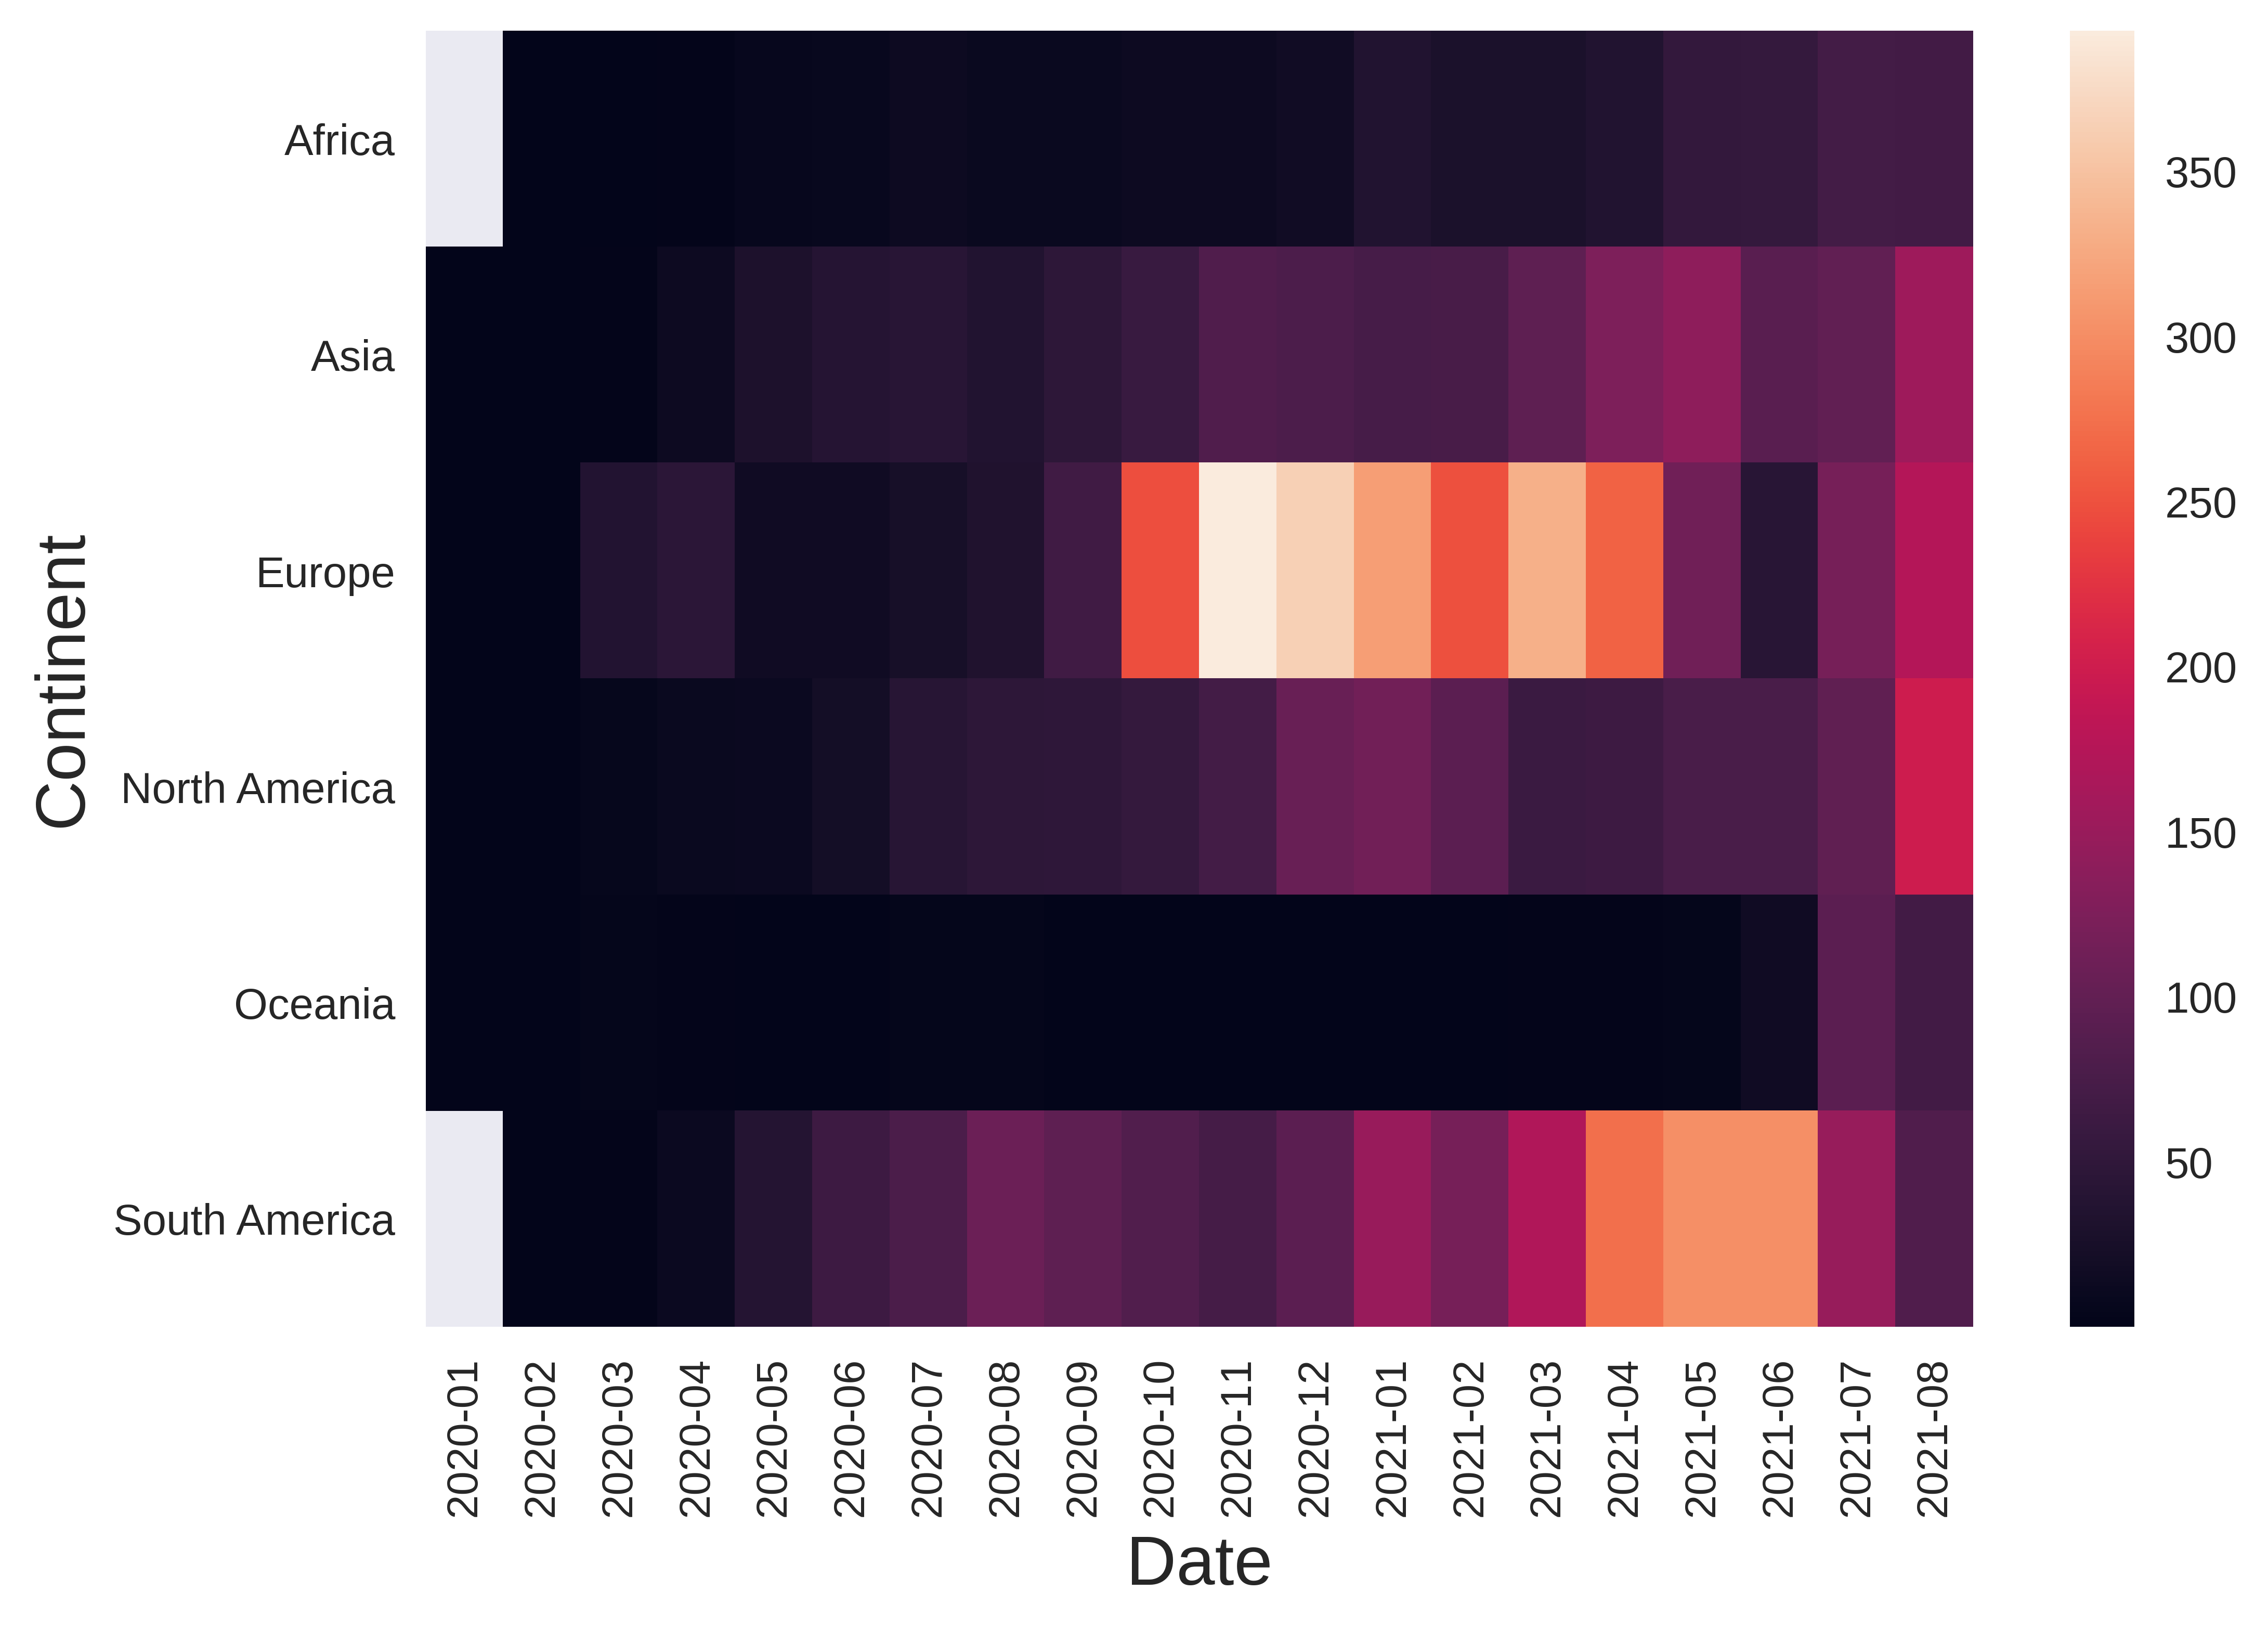

In [256]:
# visualize - heatmap

plt.figure(dpi=600)
sns.heatmap(pivoted)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Continent', fontsize=16)
plt.savefig("heatmap1.png")
plt.show()

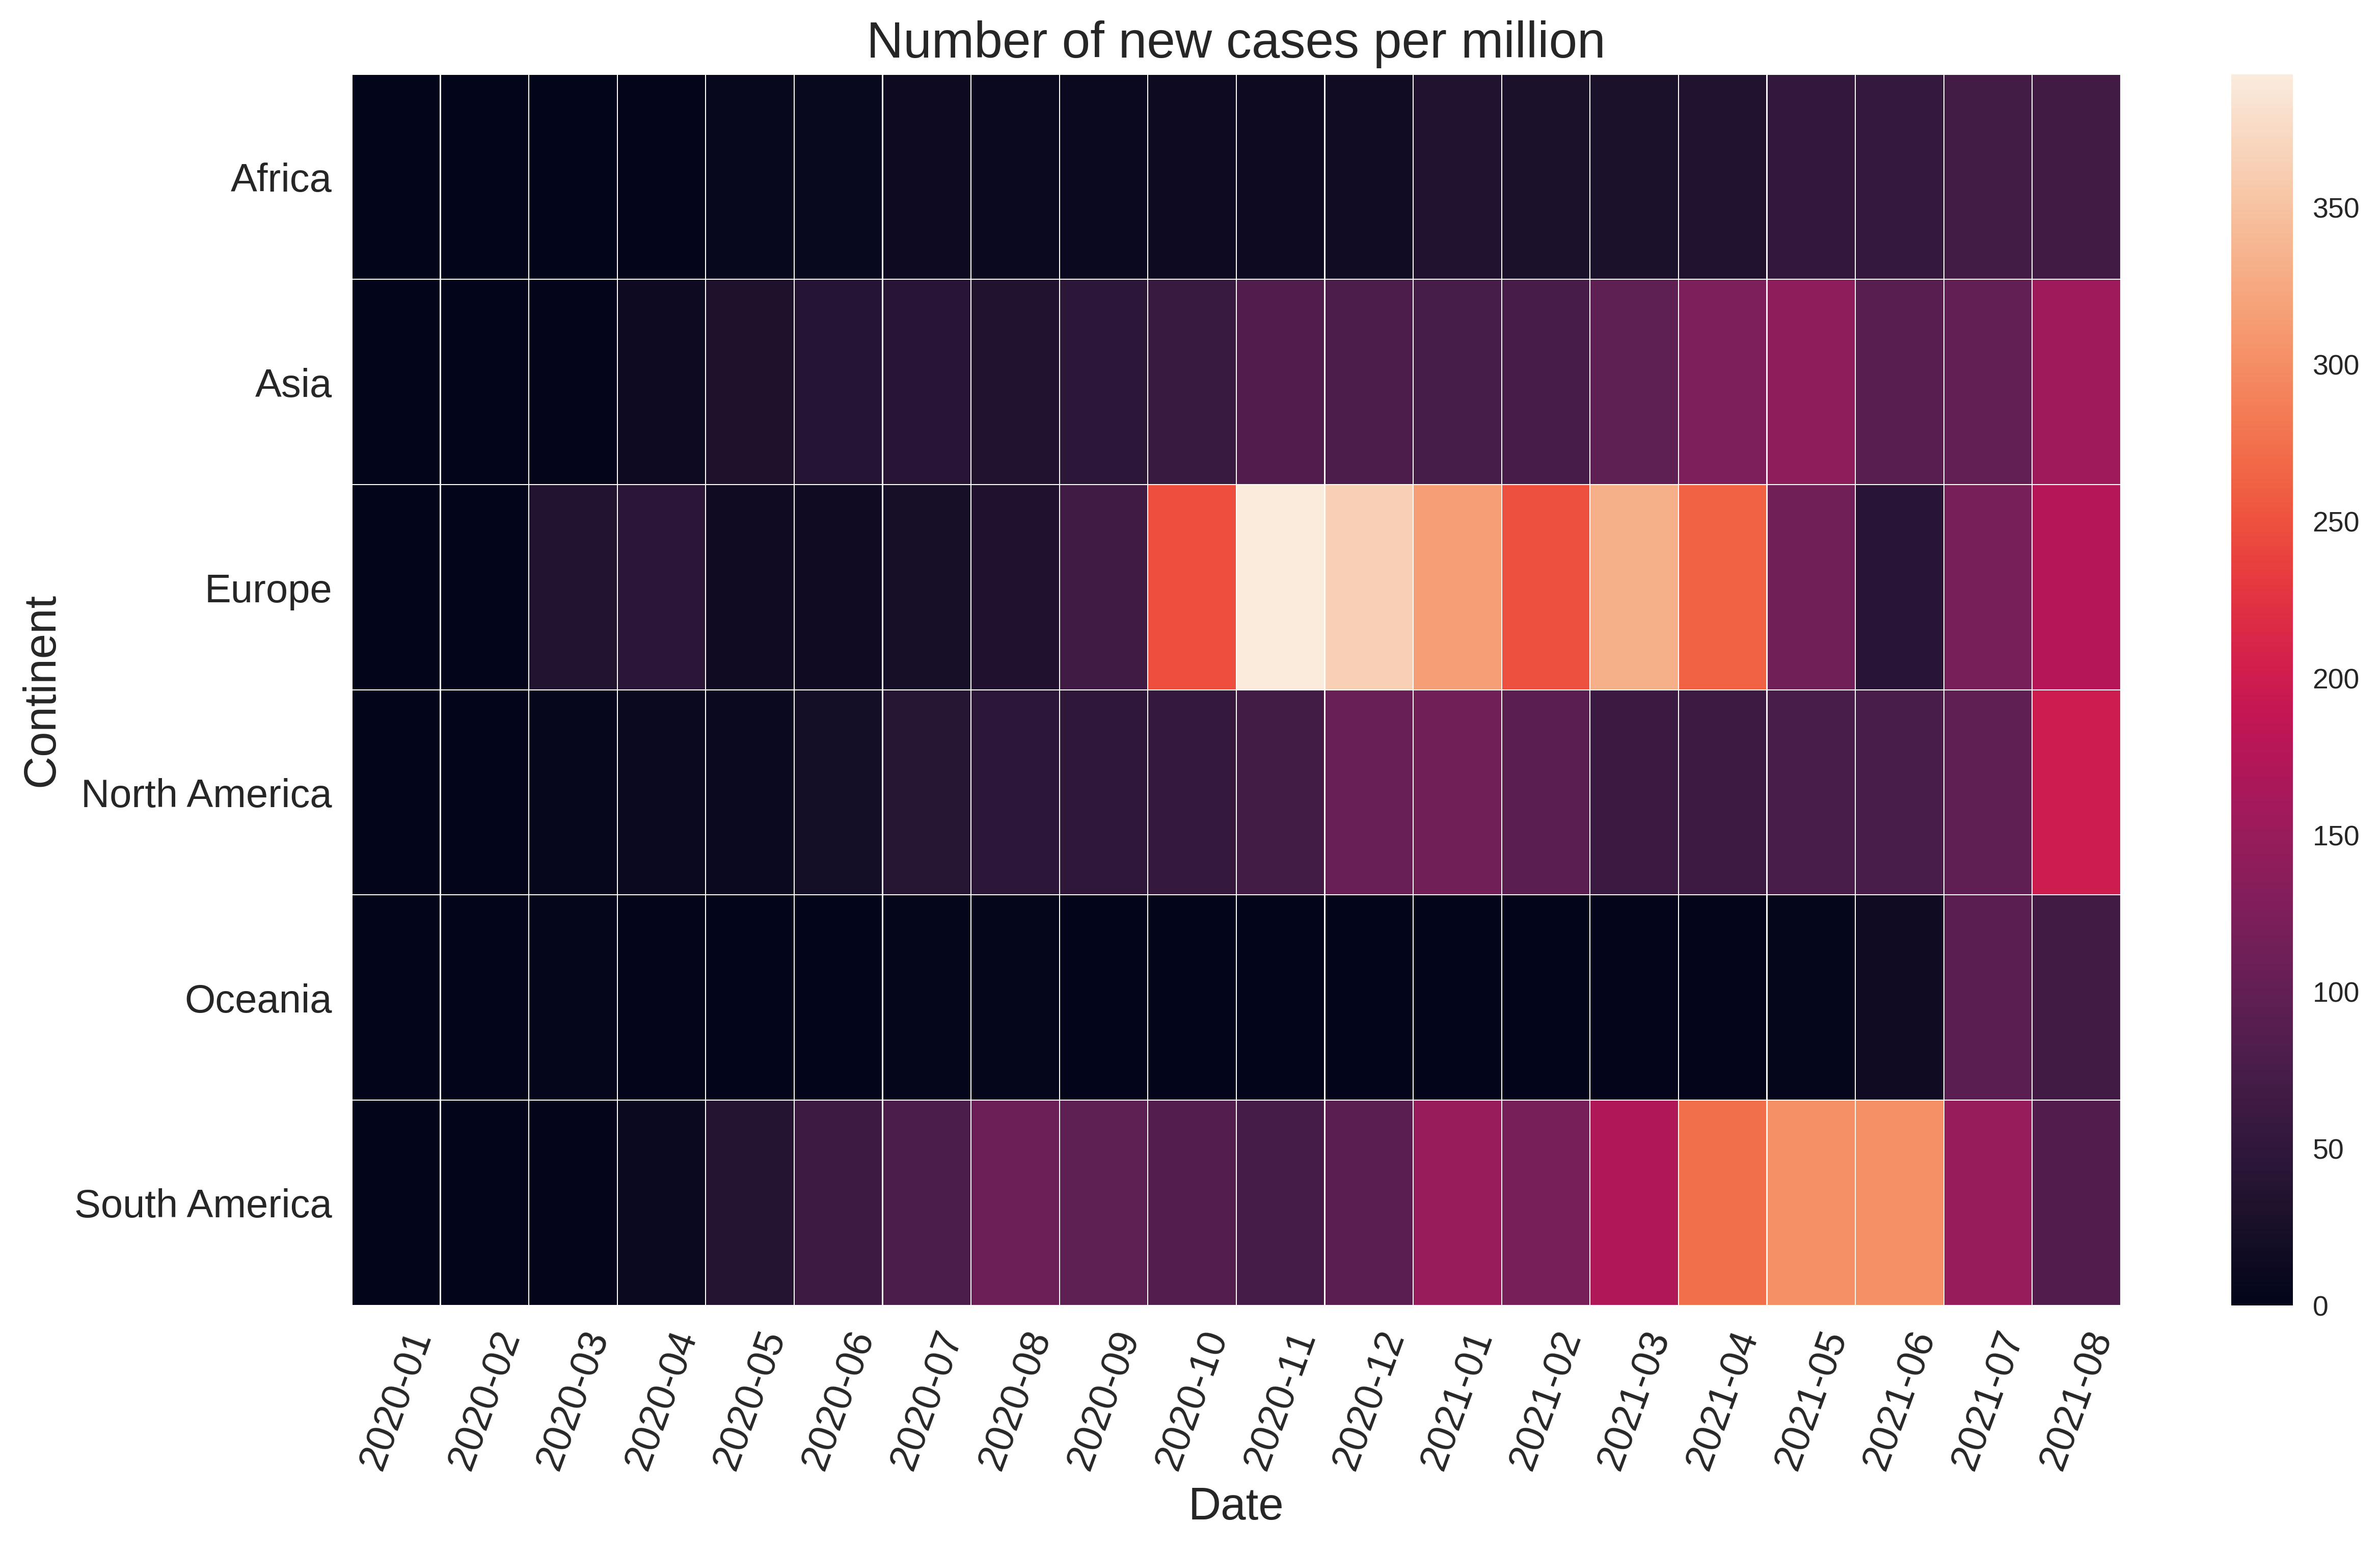

In [257]:
# visualize - heatmap -nan = 0

hm02=pivoted.replace(np.nan,0)

plt.get_cmap('inferno',10)
plt.figure(figsize=(14,8),dpi=400)
plt.title('Number of new cases per million',fontsize=18)
plt.xticks(fontsize=14,rotation='70')
plt.yticks(fontsize=14)
sns.heatmap(hm02,linewidth=0.2,annot_kws={"size": 20}) #square=True, cbar_kws={"shrink": 5.})
plt.xlabel('Date',fontsize=16)
plt.ylabel('Continent', fontsize=16)
plt.savefig("heatmap2.png",bbox_inches='tight')
plt.show()